In [4]:
import os
import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.pyplot as plt
import numpy as np

PPO_g_1743.csv (1500,)
PPO_g_1337.csv (1500,)
PPO_g_250197.csv (1500,)
PPO_g_42.csv (1500,)
PPO_g_123.csv (1500,)
PPO_g_541.csv (1500,)


/tmp/ipykernel_988282/1144650151.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


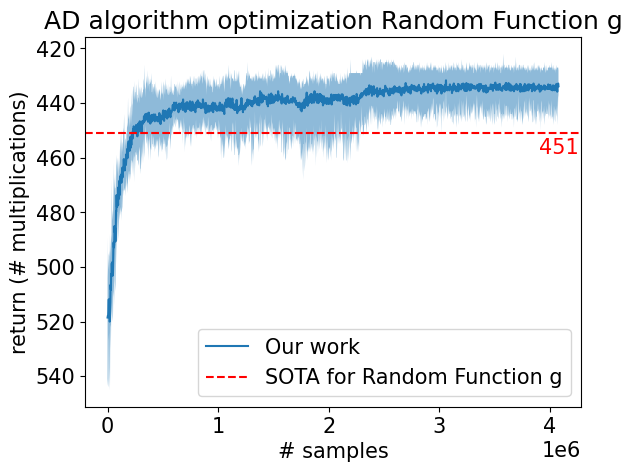

In [4]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "PPO_data/" # "A0_data/" # 
l = 1500 # 1500

runs = []
for file in os.listdir(path=os.path.join(os.getcwd(), path)):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), path, file), delimiter=",", skip_header=1)
								num_samples = data[:l, 0]*32*85
								num_muls = data[:l, 1]
								print(file, num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)


fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-451., color="r", linestyle="--", label="SOTA for Random Function g")
ax.annotate("451", (num_samples[-1], -451), textcoords="offset points", xytext=(0, -15), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization Random Function g")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [2]:
from graphax.perf import plot_performance
from graphax.examples import g

In [3]:
# 417 mults
order = [1, 99, 85, 90, 87, 47, 51, 20, 3, 66, 49, 64, 13, 11, 22, 39, 61, 43, 
         31, 2, 6, 92, 89, 29, 16, 82, 86, 60, 24, 19, 79, 56, 63, 15, 73, 57, 
         50, 33, 4, 36, 70, 41, 67, 54, 30, 14, 8, 53, 78, 46, 42, 18, 17, 62, 
         68, 76, 65, 23, 7, 58, 38, 52, 26, 91, 34, 45, 21, 40, 35, 12, 44, 75, 
         25, 5, 48, 10, 59, 84, 27, 9, 71, 37, 32, 28, 74] 

mM_order = [14, 43, 60, 66, 79, 2, 6, 11, 15, 18, 19, 20, 26, 31, 35, 36, 38, 
            41, 42, 44, 46, 47, 48, 49, 51, 53, 54, 57, 58, 62, 67, 68, 74, 76, 
            78, 82, 85, 90, 91, 1, 13, 30, 33, 39, 56, 61, 65, 70, 87, 3, 4, 7, 
            12, 16, 29, 34, 37, 40, 52, 59, 75, 86, 89, 8, 22, 28, 99, 17, 23, 
            24, 64, 73, 5, 84, 92, 32, 63, 27, 45, 10, 25, 21, 71, 50, 9]

  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 1536
99 : 1024
85 : 1024
90 : 1024
87 : 1024
47 : 1024
51 : 1024
20 : 1024
3 : 2048
66 : 512
49 : 1024
64 : 1024
13 : 1536
11 : 1024
22 : 2048
39 : 1024
61 : 1024
43 : 512
31 : 1024
2 : 1024
6 : 1024
92 : 2048
89 : 2048
29 : 2048
16 : 2048
82 : 1024
86 : 2048
60 : 512
24 : 3072
19 : 1024
79 : 512
56 : 1024
63 : 1024
15 : 1024
73 : 1024
57 : 1536
50 : 2048
33 : 1536
4 : 2048
36 : 1024
70 : 1024
41 : 1024
67 : 1024
54 : 1024
30 : 1536
14 : 512
8 : 3072
53 : 1024
78 : 1536
46 : 3072
42 : 1024
18 : 1024
17 : 3072
62 : 1024
68 : 1024
76 : 1024
65 : 1024
23 : 3072
7 : 2048
58 : 1024
38 : 1024
52 : 3072
26 : 1024
91 : 1024
34 : 4608
45 : 8192
21 : 7680
40 : 2048
35 : 1024
12 : 2048
44 : 1024
75 : 5120
25 : 6144
5 : 4096
48 : 1024
10 : 10752
59 : 2048
84 : 4096
27 : 6144
9 : 13824
71 : 12288
37 : 6144
32 : 7680
28 : 4608
74 : 14336


  0%|          | 0/1000 [00:00<?, ?it/s]

14 : 512
43 : 512
60 : 512
66 : 512
79 : 512
2 : 1024
6 : 1024
11 : 1024
15 : 1024
18 : 1024
19 : 1024
20 : 1024
26 : 1024
31 : 1024
35 : 1024
36 : 1024
38 : 1024
41 : 1024
42 : 1024
44 : 1024
46 : 1024
47 : 1024
48 : 1024
49 : 1024
51 : 1024
53 : 1024
54 : 1024
57 : 1024
58 : 1024
62 : 1024
67 : 1024
68 : 1024
74 : 1024
76 : 1024
78 : 1024
82 : 1024
85 : 1024
90 : 1024
91 : 1024
1 : 1536
13 : 1536
30 : 1536
33 : 1536
39 : 1536
56 : 1536
61 : 1536
65 : 1536
70 : 1536
87 : 1536
3 : 2048
4 : 2048
7 : 2048
12 : 2048
16 : 2048
29 : 2048
34 : 2048
37 : 2048
40 : 2048
52 : 2048
59 : 2048
75 : 2048
86 : 2048
89 : 2048
8 : 3072
22 : 3072
28 : 3072
99 : 3584
17 : 4096
23 : 4096
24 : 4096
64 : 4096
73 : 4096
5 : 4096
84 : 4096
92 : 4096
32 : 5120
63 : 5120
27 : 6144
45 : 6144
10 : 10752
25 : 10752
21 : 12288
71 : 12288
50 : 15360
9 : 19968


  0%|          | 0/1000 [00:00<?, ?it/s]

99 : 1024
92 : 2048
91 : 1024
90 : 1024
89 : 2048
87 : 1024
86 : 2048
85 : 1024
84 : 2048
82 : 1024
79 : 512
78 : 1024
76 : 1024
75 : 2048
74 : 2048
73 : 1024
71 : 3072
70 : 1024
68 : 1024
67 : 1024
66 : 1024
65 : 1024
64 : 1024
63 : 2048
62 : 1024
61 : 1024
60 : 512
59 : 3072
58 : 1024
57 : 1024
56 : 1024
54 : 1536
53 : 1024
52 : 3072
51 : 1024
50 : 5120
49 : 2048
48 : 1024
47 : 3072
46 : 1536
45 : 9216
44 : 2048
43 : 1024
42 : 1024
41 : 1024
40 : 2048
39 : 1024
38 : 2048
37 : 3072
36 : 9216
35 : 1024
34 : 5120
33 : 1024
32 : 5120
31 : 1024
30 : 1536
29 : 7168
28 : 3072
27 : 4096
26 : 1024
25 : 7168
24 : 9216
23 : 5120
22 : 4096
21 : 8192
20 : 4608
19 : 7168
18 : 5632
17 : 11264
16 : 4096
15 : 1024
14 : 512
13 : 6144
12 : 2048
11 : 5632
10 : 9216
9 : 13312
8 : 14336
7 : 2048
6 : 7680
5 : 10240
4 : 2048
3 : 10240
2 : 7168
1 : 8192


  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 1536
2 : 1024
3 : 2048
4 : 2048
5 : 3072
6 : 1024
7 : 3072
8 : 3072
9 : 6144
10 : 6144
11 : 1024
12 : 3072
13 : 1536
14 : 512
15 : 2048
16 : 5120
17 : 4096
18 : 4096
19 : 1024
20 : 1024
21 : 4608
22 : 2048
23 : 6144
24 : 3072
25 : 6144
26 : 1024
27 : 3072
28 : 4608
29 : 3072
30 : 4608
31 : 1024
32 : 4608
33 : 2560
34 : 3072
35 : 2048
36 : 2560
37 : 4096
38 : 3584
39 : 2560
40 : 3072
41 : 2560
42 : 3072
43 : 3584
44 : 2048
45 : 7680
46 : 2048
47 : 2560
48 : 2048
49 : 1024
50 : 7168
51 : 2560
52 : 6144
53 : 3584
54 : 1024
56 : 3584
57 : 4096
58 : 2560
59 : 4096
60 : 2560
61 : 4608
62 : 3584
63 : 5120
64 : 5120
65 : 3072
66 : 512
67 : 2560
68 : 2560
70 : 4096
71 : 12288
73 : 5120
74 : 7168
75 : 11264
76 : 1536
78 : 5632
79 : 2560
82 : 6144
84 : 6144
85 : 4096
86 : 7168
87 : 6656
89 : 8192
90 : 6656
91 : 2560
92 : 8192
99 : 6656


100%|██████████| 1000/1000 [01:40<00:00,  9.92it/s]


fwd mean: 82.41240692138672, rev mean: 81.6436767578125, mM mean: 82.966552734375, cc mean: 80.55999755859375
fwd err: [-2.9736862  2.8525848], rev err: [-3.5594559  2.8157883], mM err: [-1.1659012  1.3775482], cc err: [-2.303955   1.6102905]


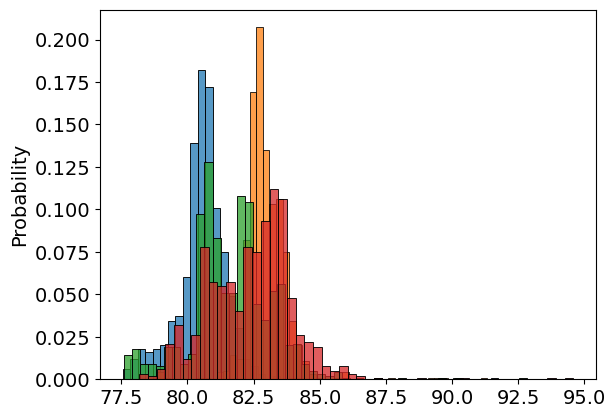

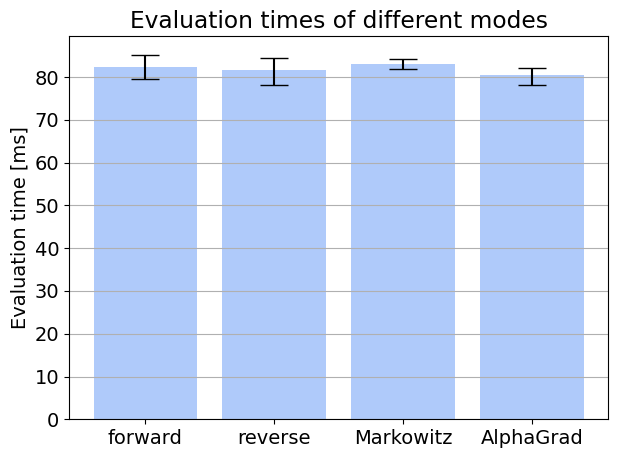

In [7]:
shape = (512,)
xs = [.01]*15
xs = [jnp.ones(shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
plot_performance(g, xs, order, mM_order, "./g.png", samplesize=1000)

  0%|          | 0/110 [00:00<?, ?it/s]

100%|██████████| 110/110 [05:01<00:00,  2.74s/it]


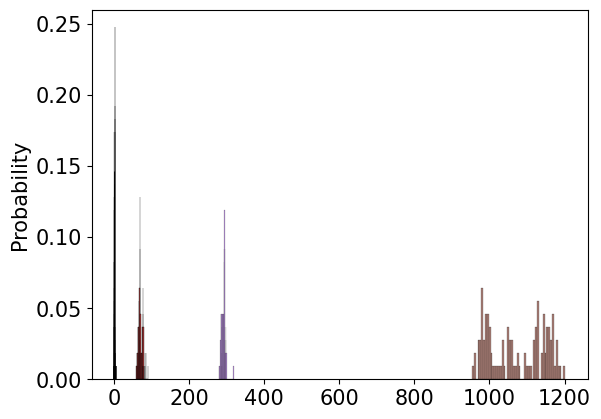

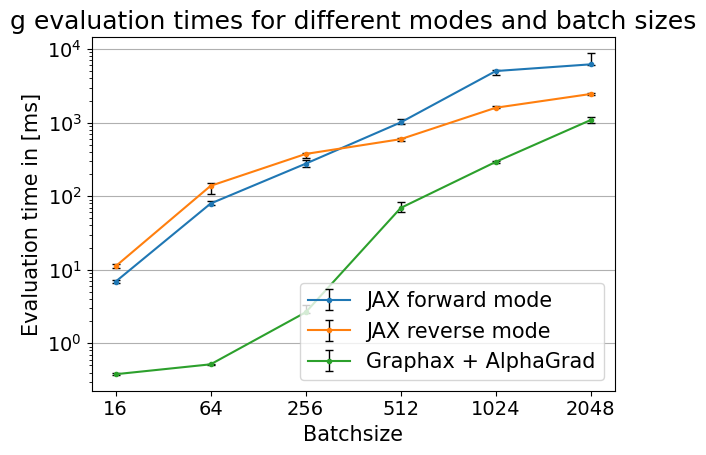

In [6]:
from graphax.perf import plot_performance_over_size_jax

shapes = (16, 64, 256, 512, 1024, 2048)
key = jrand.PRNGKey(1234)
xs = [.01]*15
xs = [[jrand.uniform(key, (shape,))*x for x in xs] for shape in shapes]
xs = jax.device_put(xs, jax.devices("cpu")[0])

plot_performance_over_size_jax(g, xs, order, "g", ticks=shapes, samplesize=110)